In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

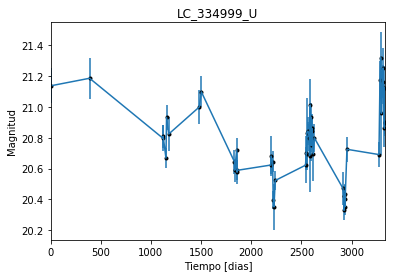

In [3]:
data = np.genfromtxt('LC_334999_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_334999_U')
plt.savefig("LC_334999_U.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

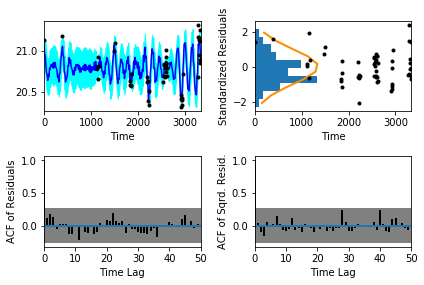

In [6]:
sample.assess_fit()

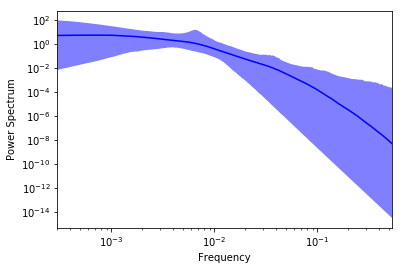

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

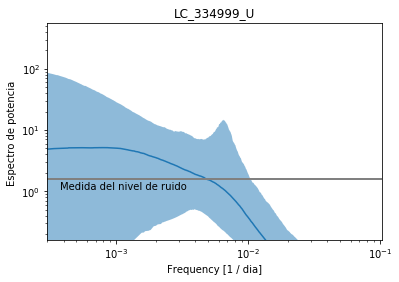

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_334999_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_334999_U')

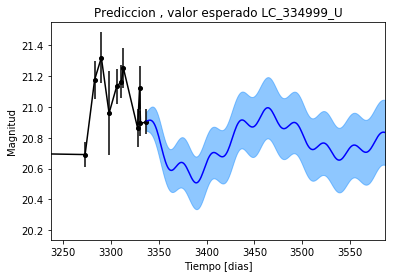

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_334999_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_334999_U')

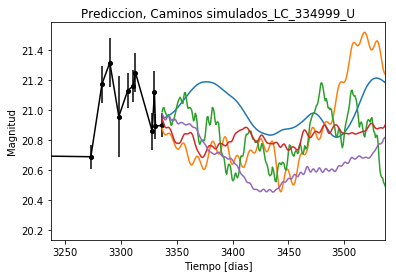

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_334999_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


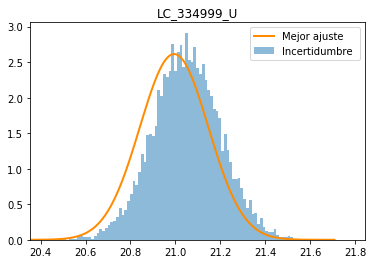

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_334999_U')
plt.savefig("Mejor_ajuste_LC_334999_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_334999_U')

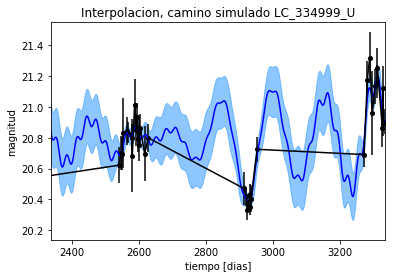

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_334999_U')

Text(0.5,1,'Interpolacion, camino simulado LC_334999_U')

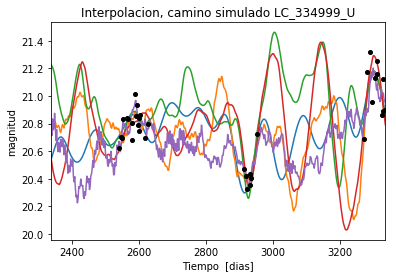

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_334999_U')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 821.741939721
Median: 0.0117079408043
Standard deviation: 0.197184287007
68% credibility interval: [ 0.00096571  0.17111045]
95% credibility interval: [  3.74706998e-04   7.84808431e-01]
99% credibility interval: [  3.22527037e-04   1.00968976e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 364.600621157
Median: 0.00662031854109
Standard deviation: 0.119151954106
68% credibility interval: [ 0.00081564  0.07896007]
95% credibility interval: [  3.65712010e-04   4.41297841e-01]
99% credibility interval: [  3.22527037e-04   7.48772069e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 446.221088521
Median: 0.0249017437888


In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 979.751121016
Median: 49.8455203669
Standard deviation: 1.77136082143
68% credibility interval: [ 47.87857151  51.12735133]
95% credibility interval: [ 45.33613448  52.23767183]
99% credibility interval: [ 43.16593431  53.58667628]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 368.28032353
Median: 0.606741296921
Standard deviation: 2.5609855837
68% credibility interval: [ 0.07780895  4.29672492]
95% credibility interval: [ 0.01650576  8.95640233]
99% credibility interval: [  1.21796351e-02   1.25964748e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 941.733799713
Median: 0.90608870096
Standard deviation: 12.27068573
68% credibility interval: [  0.04020598  13.48188684]
95% credibility interval: [  4.5101

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 761.087814752
Median: 9.56527290871e-34
Standard deviation: 5.33134797788e+71
68% credibility interval: [  2.43090738e-117   3.43041891e+010]
95% credibility interval: [  6.12214346e-182   2.22214680e+061]
99% credibility interval: [  1.55731541e-195   8.19752792e+070]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1287.8230156
Median: 20.7992287944
Standard deviation: 0.0945853158946
68% credibility interval: [ 20.72559019  20.88134646]
95% credibility interval: [ 20.63857732  21.0168439 ]
99% credibility interval: [ 20.54015278  21.16871624]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 349.656175252
Median: 0.0578127028653
Standard deviation: 0.275331497707
68% credibility interval: [ 0.0020708  0.4586859]
95% credibility interval: [ 0.          0.97317207]
99% credibility interval: [ 0.          1.04193171]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 349.656175252
Median: 0.0578127028653
Standard deviation: 0.275331497707
68% credibility interval: [ 0.0020708  0.4586859]
95% credibility interval: [ 0.          0.97317207]
99% credibility interval: [ 0.          1.04193171]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 752.121835716
Median: 0.0
Standard deviation: 0.0027380319692
68% credibil

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 979.751121016
Median: 49.8455203669
Standard deviation: 1.77136082143
68% credibility interval: [ 47.87857151  51.12735133]
95% credibility interval: [ 45.33613448  52.23767183]
99% credibility interval: [ 43.16593431  53.58667628]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1045.60430944
Median: 0.0621928809536
Standard deviation: 0.0468984786759
68% credibility interval: [ 0.03990482  0.10605817]
95% credibility interval: [ 0.02747977  0.19844436]
99% credibility interval: [ 0.02158369  0.30592186]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1460.97750153
Median: 0.946382929748
Standard deviation: 0.177764764599
68% credibility interval: [ 0.79463537  1.13662929]
95% credibility interval: [ 0.67276895  1.37149289]
99% credibility interval: [ 0.59762475  1.54086598]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 891.162200564
Median: 0.00213442930034
Standard deviation: 0.695898648775
68% credibility interval: [  4.22866969e-14   1.26122415e-01]
95% credibility interval: [  6.72280147e-65   1.43047708e+00]
99% credibility interval: [  1.22016787e-74   5.47394518e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 821.741939721
Median: (-0.0735631616392-0.401510686317j)
Standard deviation: 2.12784944569
68% credibility interval: [-1.07511864-1.57747087j -0.00606771-0.10676482j]
95% credibility interval: [ -4.93109680e+00+0.j          -2.35435350e-03-0.07519482j]
99% credibility interval: [ -6.34406787e+00+0.j          -2.02649714e-03-0.04334902j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 364.600621157
Median: (-0.0415966881862+0.167193652354j)
Standard deviation: 1.88500399087
68% credibility interval: [-0.49612073+1.74431037j -0.00512482+0.56662072j]
95% credibility interval: [ -2.77275611e+00+4.17948174j  -2.29783633e-03+1.51821856j]
99% credibility interval: [ -4.70467366e+00+1.64514227j  -2.02649714e-03+0.04334902j]
Po